# 使用卷积网络分类心电信号

之前想的是将信号处理之后再训练，按照RR周期的大小截取心电得到每个样本的长度都不一致，后续的处理没想到很好的解决办法。看到有的文献直接将滤波后的信号丢到神经网络中训练，这里想着先尝试着试一下把滤波的信号放进神经网络训练，如果不行，再试着放入原始的心电信号。这里唯一的处理就是对样本不平衡的处理

In [22]:
# import main modules
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("torch version:", torch.__version__)
print("device:", device)

torch version: 1.9.0+cu102
device: cuda


## 读取数据集

In [5]:
data_filepath = "../data/numpy_data/"

X_train = np.load(data_filepath + 'X_train.npy')
y_train = np.load(data_filepath + 'y_train.npy', allow_pickle=True)
X_test = np.load(data_filepath + 'X_test.npy')
y_test = np.load(data_filepath + 'y_test.npy', allow_pickle=True)

# reshape y_train, y_test
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [6]:
y_train

array([[list(['NORM'])],
       [list(['NORM'])],
       [list(['NORM'])],
       ...,
       [list(['STTC'])],
       [list(['NORM'])],
       [list(['NORM'])]], dtype=object)

### 将y映射为数组

In [7]:
num2class = np.array(['NORM', 'MI', 'STTC', 'CD', 'HYP'])

In [8]:
# 类别映射函数
def label2num(labels):
    for index in range(len(labels)):
        labels[index] = np.where(num2class == labels[index][0][0])[0]

In [9]:
label2num(y_train)
label2num(y_test)

In [10]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [2],
       [0],
       [0]], dtype=object)

In [11]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [3],
       [1]], dtype=object)

In [12]:
y_train.shape

(16966, 1)

In [13]:
y_test.shape

(1901, 1)

In [14]:
y_train = y_train.astype('uint8')
y_test = y_test.astype('uint8')

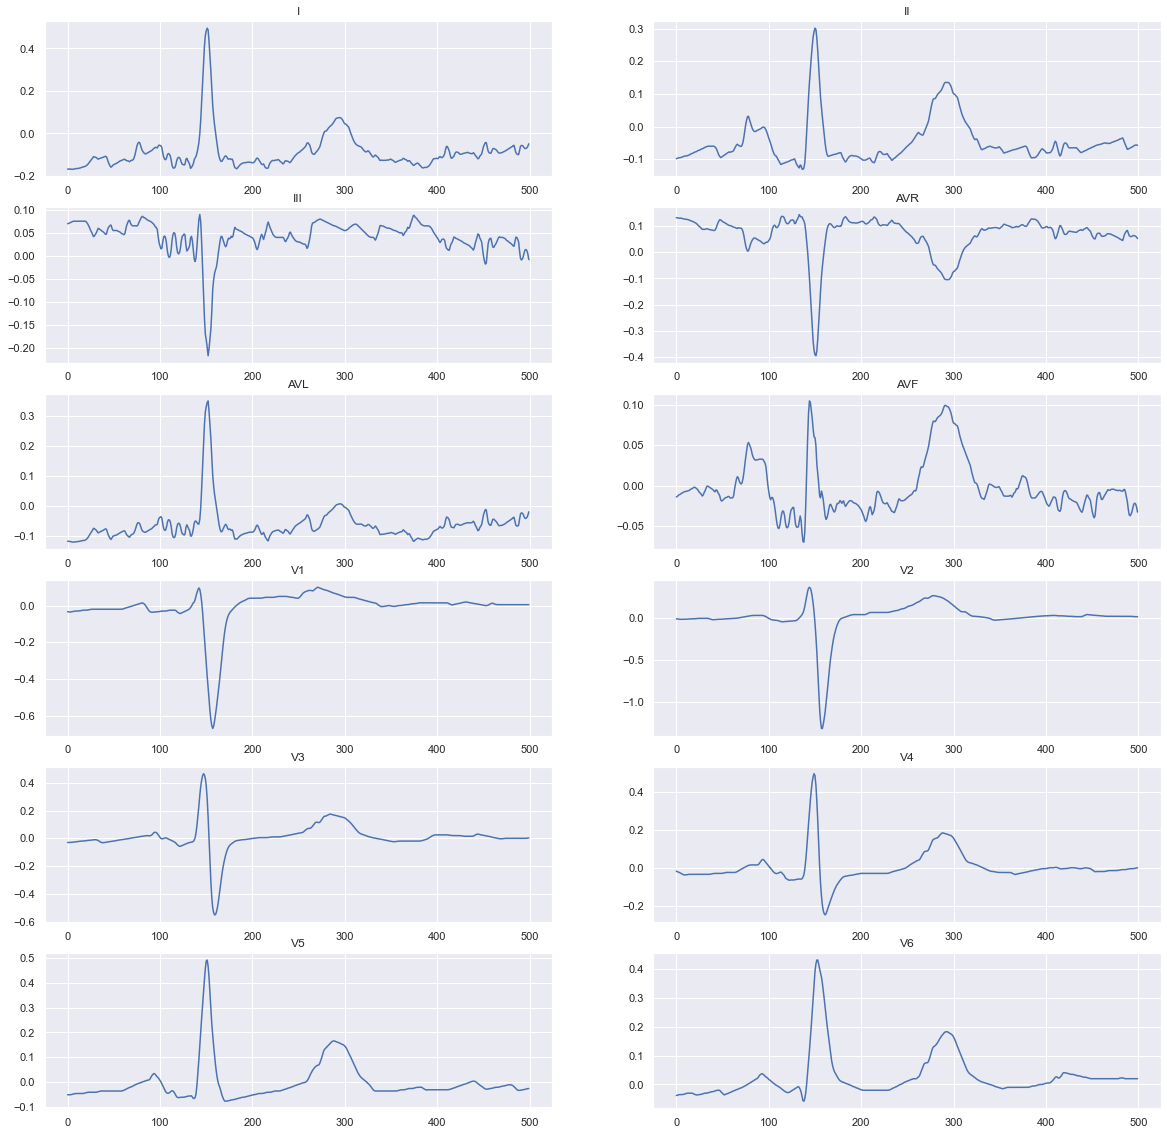

In [23]:
plt.figure(figsize=(20,20))
signame = ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
for i in range(12):
    plt.subplot(6, 2, i+1)
    plt.plot(X_train[1000][:,i])
    plt.title(signame[i])
plt.show()